# EDA: CheXpert

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
# import libraries
import pandas as pd
pd.options.display.max_columns = None
import numpy as np
import random
import os

# Matplotlib
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [ ]:
# need this to change to necessary directory
os.chdir('/Users/joeai/Springboard/capstone_2')

In [15]:
capstone_path = os.getcwd()
capstone_path

'/Users/joeai/Springboard/capstone_2'

In [12]:
data_path = capstone_path + '/data/CheXpert-v1.0-small/'
data_path

'/Users/joeai/Springboard/capstone_2/data/CheXpert-v1.0-small/'

In [13]:
data_path + 'train.csv'

'/Users/joeai/Springboard/capstone_2/data/CheXpert-v1.0-small/train.csv'

# Unzip CheXpert Data

In [27]:
%%time

#import zipfile
#zip_ref = zipfile.ZipFile(data_path + '/CheXpert-v1.0-small.zip', 'r')
#zip_ref.extractall(data_path)
#zip_ref.close()

CPU times: user 1e+03 ns, sys: 1e+03 ns, total: 2 µs
Wall time: 3.81 µs


# Loading the Data

In [16]:
from pathlib import Path
path = Path(capstone_path)
path

PosixPath('/Users/joeai/Springboard/capstone_2')

In [17]:
train_df = pd.read_csv(path/'data/CheXpert-v1.0-small/train.csv')
valid_df = pd.read_csv(path/'data/CheXpert-v1.0-small/valid.csv')

In [18]:
train_df.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,NaN,NaN,-1.0,1.0,NaN,-1.0,-1.0,NaN,-1.0,NaN,-1.0,NaN,1.0,NaN
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,NaN,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [19]:
valid_df.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/valid/patient64541/study1/...,Male,73,Frontal,AP,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CheXpert-v1.0-small/valid/patient64542/study1/...,Male,70,Frontal,PA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,CheXpert-v1.0-small/valid/patient64542/study1/...,Male,70,Lateral,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,CheXpert-v1.0-small/valid/patient64543/study1/...,Male,85,Frontal,AP,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CheXpert-v1.0-small/valid/patient64544/study1/...,Female,42,Frontal,AP,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223414 entries, 0 to 223413
Data columns (total 19 columns):
Path                          223414 non-null object
Sex                           223414 non-null object
Age                           223414 non-null int64
Frontal/Lateral               223414 non-null object
AP/PA                         191027 non-null object
No Finding                    22381 non-null float64
Enlarged Cardiomediastinum    44839 non-null float64
Cardiomegaly                  46203 non-null float64
Lung Opacity                  117778 non-null float64
Lung Lesion                   11944 non-null float64
Edema                         85956 non-null float64
Consolidation                 70622 non-null float64
Pneumonia                     27608 non-null float64
Atelectasis                   68443 non-null float64
Pneumothorax                  78934 non-null float64
Pleural Effusion              133211 non-null float64
Pleural Other                 6492 non-n

In [21]:
valid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 19 columns):
Path                          234 non-null object
Sex                           234 non-null object
Age                           234 non-null int64
Frontal/Lateral               234 non-null object
AP/PA                         202 non-null object
No Finding                    234 non-null float64
Enlarged Cardiomediastinum    234 non-null float64
Cardiomegaly                  234 non-null float64
Lung Opacity                  234 non-null float64
Lung Lesion                   234 non-null float64
Edema                         234 non-null float64
Consolidation                 234 non-null float64
Pneumonia                     234 non-null float64
Atelectasis                   234 non-null float64
Pneumothorax                  234 non-null float64
Pleural Effusion              234 non-null float64
Pleural Other                 234 non-null float64
Fracture                      234 

## Observations 

As we can see above, `train_df` has quite a few `NaN`s which isn't good. However, upon further investigation of Stanford's Machine Learning GitHub page, we can clarify that missing values mean that no mention of that particular pathology was extracted via the labeler. 

Stanford treated those cases as negative (i.e. `0`) when they created their own model. So we can begin by inputing `0` for these pathological columns.

In [22]:
# gather list of pathologies
pathology_list = list(train_df.columns[5:])

In [23]:
train_df[pathology_list] = train_df[pathology_list].fillna(0)

In [24]:
train_df[pathology_list] = train_df[pathology_list].astype(int)

In [25]:
train_df.isnull().sum() / len(train_df)

Path                          0.000000
Sex                           0.000000
Age                           0.000000
Frontal/Lateral               0.000000
AP/PA                         0.144964
No Finding                    0.000000
Enlarged Cardiomediastinum    0.000000
Cardiomegaly                  0.000000
Lung Opacity                  0.000000
Lung Lesion                   0.000000
Edema                         0.000000
Consolidation                 0.000000
Pneumonia                     0.000000
Atelectasis                   0.000000
Pneumothorax                  0.000000
Pleural Effusion              0.000000
Pleural Other                 0.000000
Fracture                      0.000000
Support Devices               0.000000
dtype: float64

## _Observations_

Looks like we're good to go...except for the `AP/PA` column. Let's take a look at what this column represents.

In [26]:
train_df['AP/PA'].head(10)

0     AP
1     AP
2     AP
3    NaN
4     AP
5     PA
6    NaN
7     PA
8    NaN
9     AP
Name: AP/PA, dtype: object

In [27]:
train_df['AP/PA'].value_counts()

AP    161590
PA     29420
LL        16
RL         1
Name: AP/PA, dtype: int64

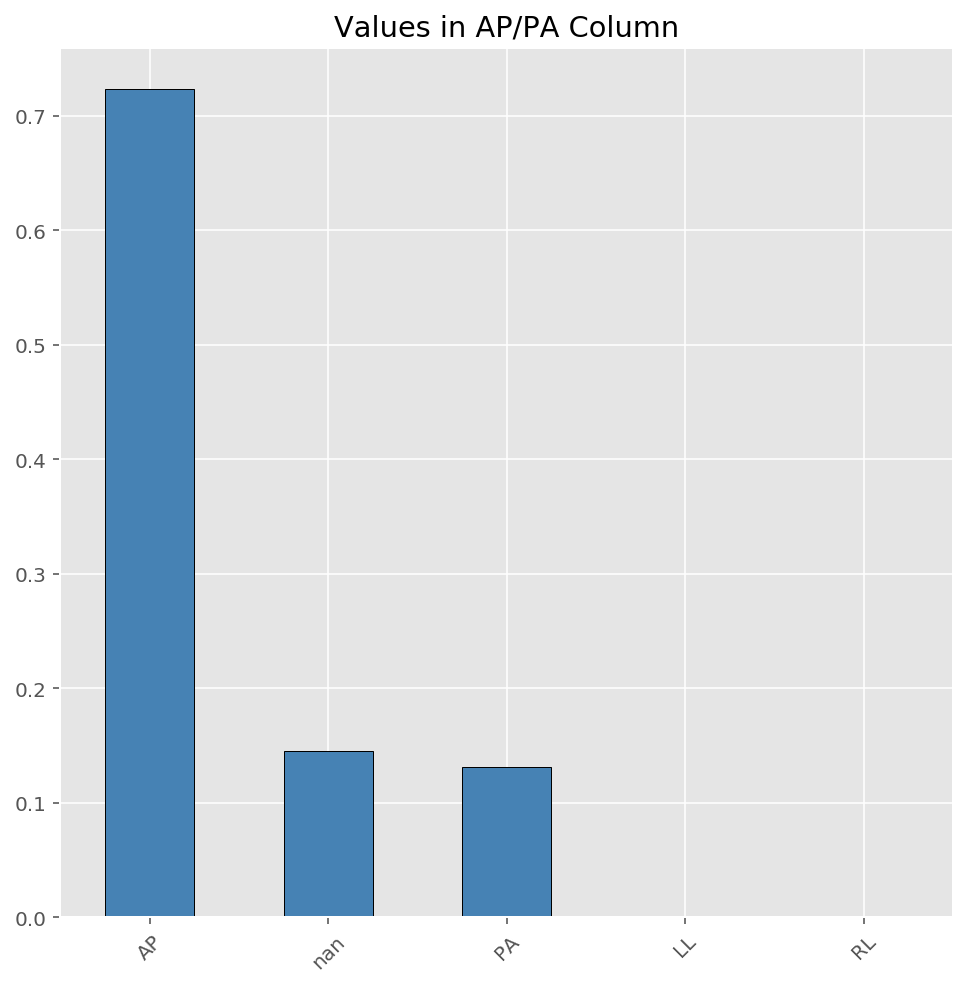

In [28]:
train_df['AP/PA'].value_counts(normalize=True, dropna=False).plot(kind='bar', figsize=(8,8), color='steelblue', edgecolor='black')
plt.xticks(rotation=45)
plt.title('Values in AP/PA Column');

## What do `AP`, `PA` mean?

Simply put, it has to do with the positioning of the patient. 

`PA` stands for posterioranterior which is obtained when the patient is in a standing position, facing the cassette and the x-ray tube is approximately 72 inches away.

`AP` stands for anteriorposterior which is when the patient is lying down and the x-ray tube is only 40 inches from the patient. [(Source)](https://www.med-ed.virginia.edu/courses/rad/cxr/technique3chest.html)

It also looks like we have a very small number of observations that were labeled as either `LL` or `RL`. 

I'll have to do some further investigation into these particular labels...

However, since we'll be focus on labeling images, we won't have to worry too much about the unlabeled observations since we'll be feeding the images directly into the deep learning model. 

## _Focus: Sex & Age_

In [29]:
train_df['Sex'] = train_df['Sex'].astype('category')
train_df['Sex'].dtype

CategoricalDtype(categories=['Female', 'Male', 'Unknown'], ordered=False)

In [30]:
train_df['Sex'].value_counts()

Male       132636
Female      90777
Unknown         1
Name: Sex, dtype: int64

In [31]:
train_df['Sex'].value_counts(normalize=True)

Male       0.593678
Female     0.406317
Unknown    0.000004
Name: Sex, dtype: float64

In [32]:
list_df = [train_df, valid_df]

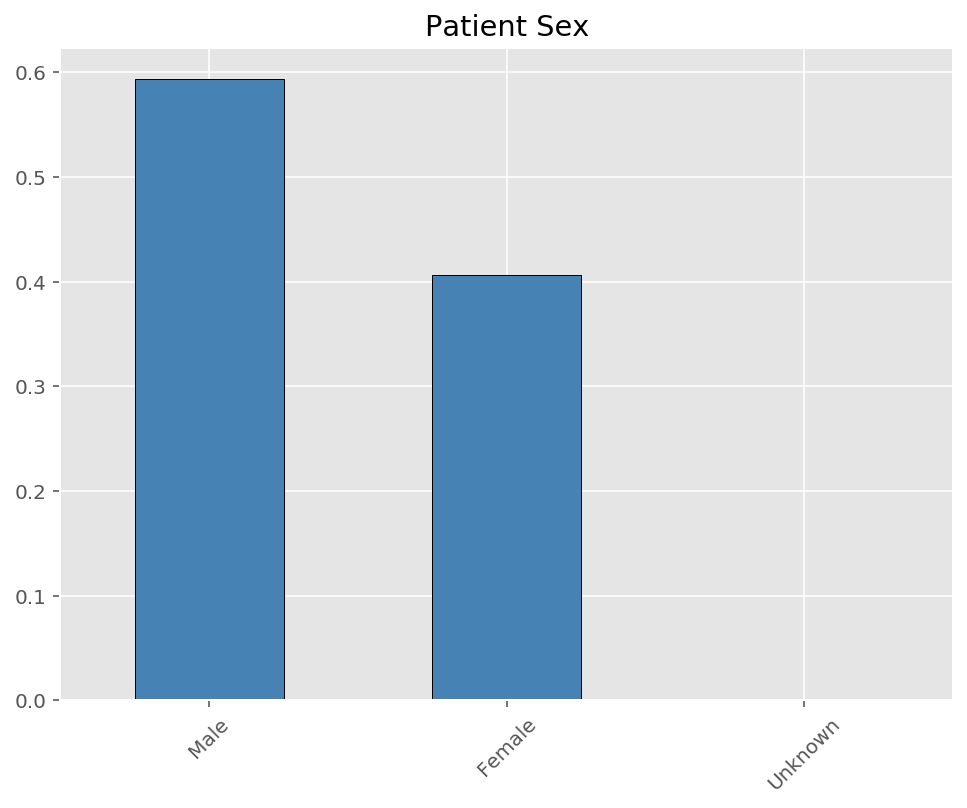

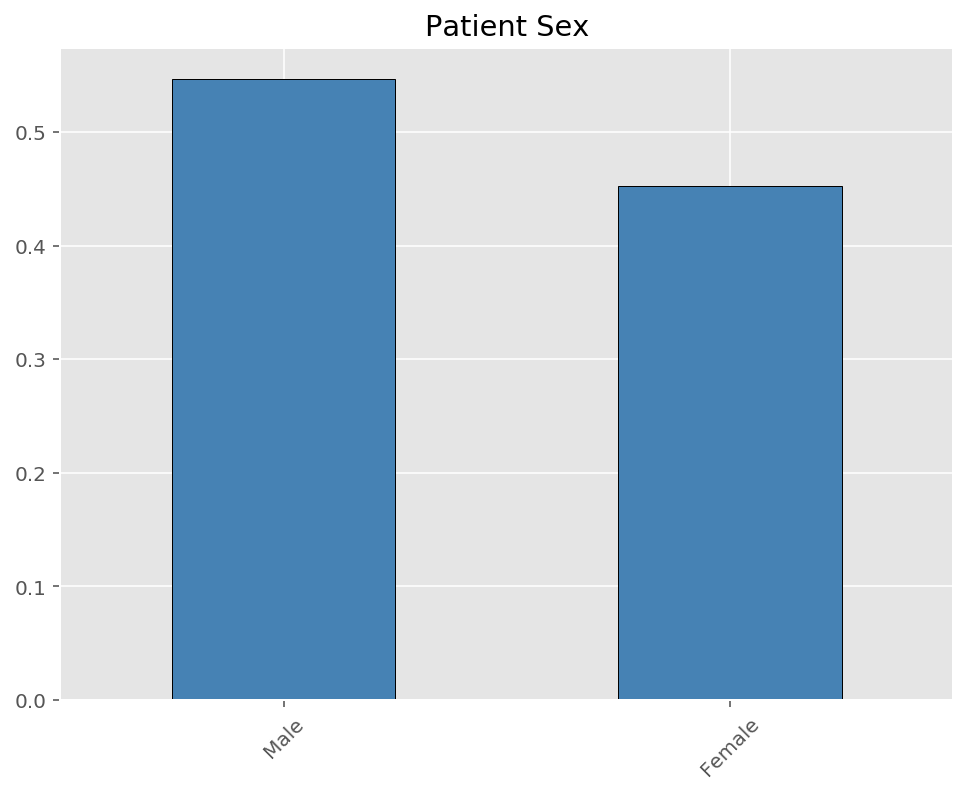

In [33]:
for df in list_df:
    plt.figure(figsize=(8,6))
    df['Sex'].value_counts(normalize=True).plot(kind='bar', color='steelblue', edgecolor='black')
    plt.title('Patient Sex')
    plt.xticks(rotation=45);

count    223414.000000
mean         60.430653
std          17.820925
min           0.000000
25%          49.000000
50%          62.000000
75%          74.000000
max          90.000000
Name: Age, dtype: float64


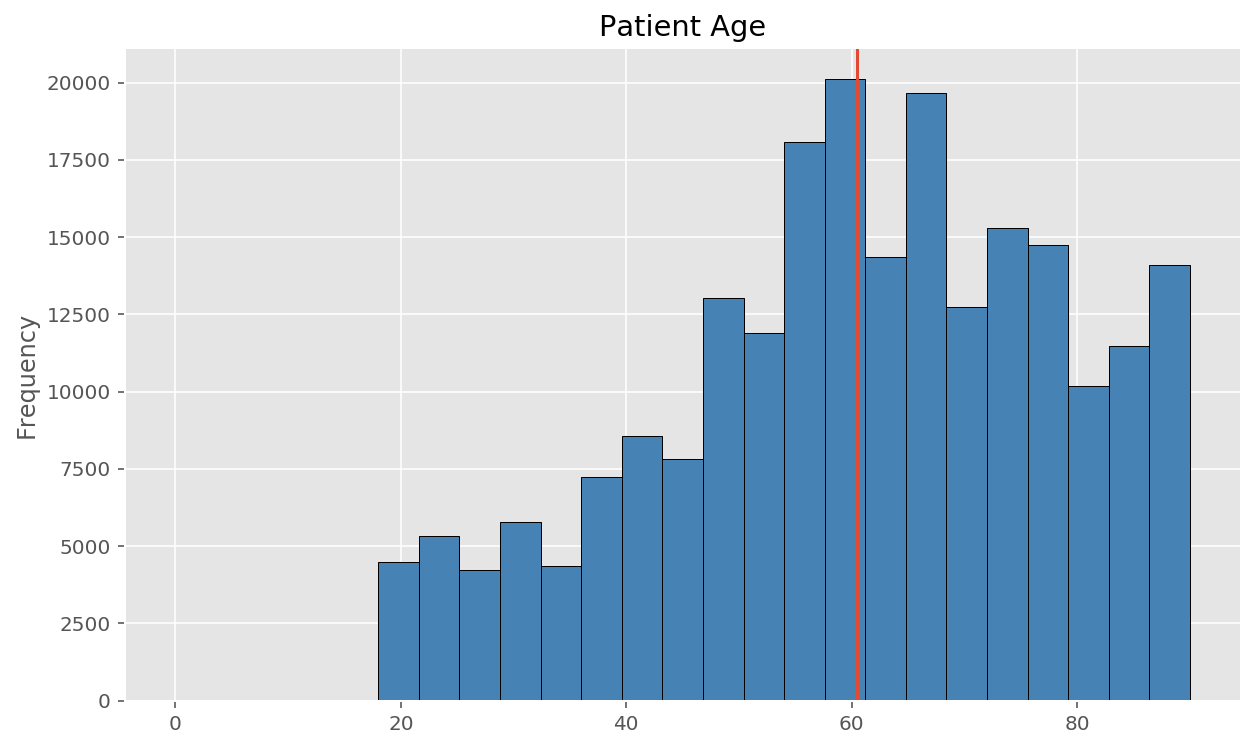

In [34]:
train_df['Age'].plot(kind='hist', color='steelblue', edgecolor='black', bins=25, figsize=(10,6))
plt.axvline(x=np.mean(train_df['Age']))
plt.title('Patient Age')
print(train_df['Age'].describe());

count    234.000000
mean      60.790598
std       18.554032
min       18.000000
25%       48.250000
50%       62.500000
75%       75.000000
max       90.000000
Name: Age, dtype: float64


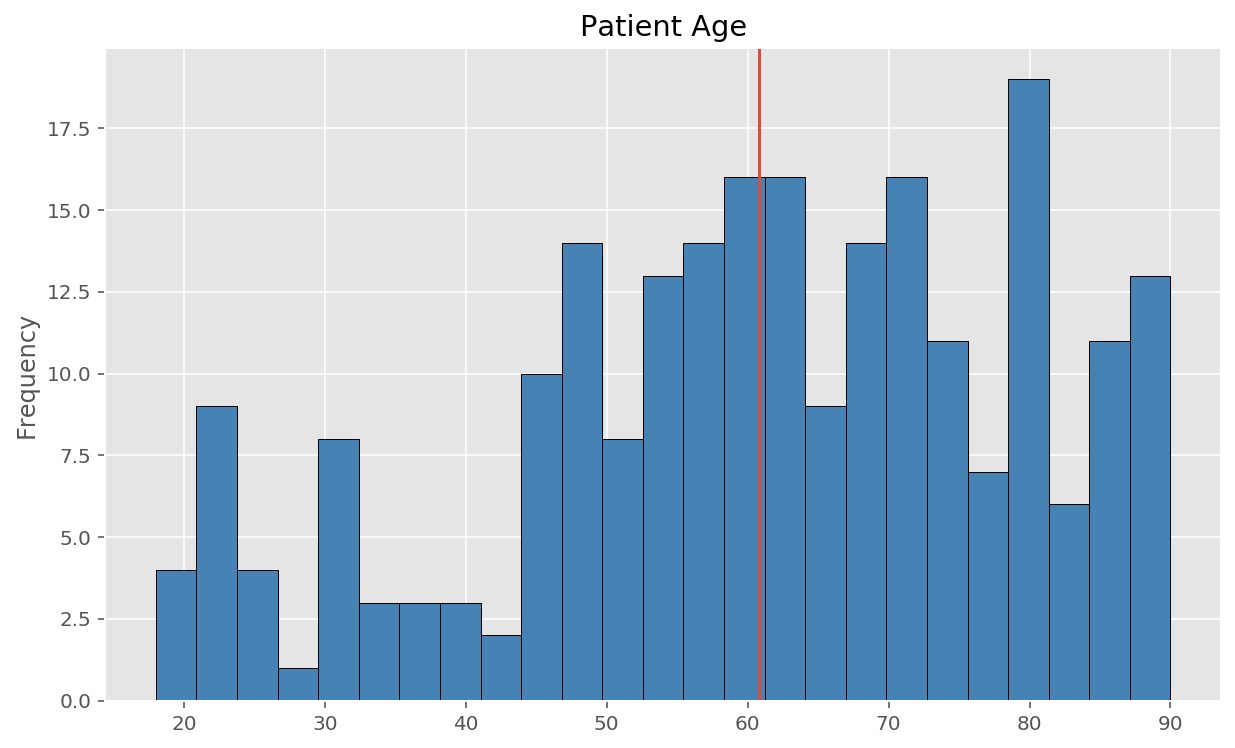

In [35]:
valid_df['Age'].plot(kind='hist', color='steelblue', edgecolor='black', bins=25, figsize=(10,6))
plt.axvline(x=np.mean(valid_df['Age']))
plt.title('Patient Age')
print(valid_df['Age'].describe());

## _Analyze Pathologies_

In [36]:
pathology_list.sort()
pathology_list

['Atelectasis',
 'Cardiomegaly',
 'Consolidation',
 'Edema',
 'Enlarged Cardiomediastinum',
 'Fracture',
 'Lung Lesion',
 'Lung Opacity',
 'No Finding',
 'Pleural Effusion',
 'Pleural Other',
 'Pneumonia',
 'Pneumothorax',
 'Support Devices']

In [37]:
for pathology in pathology_list:
    print(pathology)
    print('-' * 30)
    print(train_df[pathology].value_counts(normalize=True))
    print('')

Atelectasis
------------------------------
 0    0.699594
-1    0.151016
 1    0.149391
Name: Atelectasis, dtype: float64

Cardiomegaly
------------------------------
 0    0.842951
 1    0.120852
-1    0.036197
Name: Cardiomegaly, dtype: float64

Consolidation
------------------------------
 0    0.809658
-1    0.124173
 1    0.066169
Name: Consolidation, dtype: float64

Edema
------------------------------
 0    0.708031
 1    0.233853
-1    0.058116
Name: Edema, dtype: float64

Enlarged Cardiomediastinum
------------------------------
 0    0.896152
-1    0.055516
 1    0.048332
Name: Enlarged Cardiomediastinum, dtype: float64

Fracture
------------------------------
 0    0.956663
 1    0.040463
-1    0.002874
Name: Fracture, dtype: float64

Lung Lesion
------------------------------
 0    0.952223
 1    0.041116
-1    0.006660
Name: Lung Lesion, dtype: float64

Lung Opacity
------------------------------
 0    0.502363
 1    0.472580
-1    0.025057
Name: Lung Opacity, dtype: float

In [40]:
len(train_df[train_df['Pneumothorax'] == -1])

3145

In [41]:
train_df['Pneumothorax'].value_counts()

 0    200821
 1     19448
-1      3145
Name: Pneumothorax, dtype: int64

In [85]:
pathology_list

['Atelectasis',
 'Cardiomegaly',
 'Consolidation',
 'Edema',
 'Enlarged Cardiomediastinum',
 'Fracture',
 'Lung Lesion',
 'Lung Opacity',
 'No Finding',
 'Pleural Effusion',
 'Pleural Other',
 'Pneumonia',
 'Pneumothorax',
 'Support Devices']

In [102]:
uncertainty_dict = {}

for pathology in pathology_list:
    uncertainty_value = len(train_df[train_df[pathology] == -1])
    total_uncertainty = round(uncertainty_value / len(train_df) * 100, 2)
    uncertainty_dict[pathology] = uncertainty_value
    print('{}: {} or {}% of observations in that column.'.format(pathology, uncertainty_value, total_uncertainty))

Atelectasis: 33739 or 15.1% of observations in that column.
Cardiomegaly: 8087 or 3.62% of observations in that column.
Consolidation: 27742 or 12.42% of observations in that column.
Edema: 12984 or 5.81% of observations in that column.
Enlarged Cardiomediastinum: 12403 or 5.55% of observations in that column.
Fracture: 642 or 0.29% of observations in that column.
Lung Lesion: 1488 or 0.67% of observations in that column.
Lung Opacity: 5598 or 2.51% of observations in that column.
No Finding: 0 or 0.0% of observations in that column.
Pleural Effusion: 11628 or 5.2% of observations in that column.
Pleural Other: 2653 or 1.19% of observations in that column.
Pneumonia: 18770 or 8.4% of observations in that column.
Pneumothorax: 3145 or 1.41% of observations in that column.
Support Devices: 1079 or 0.48% of observations in that column.


In [107]:
from test_folder import eda

uncertainty_dict = eda.uncertainty_dict(pathology_list, train_df)

Atelectasis: 33739 or 15.1% of observations in that column.
Cardiomegaly: 8087 or 3.62% of observations in that column.
Consolidation: 27742 or 12.42% of observations in that column.
Edema: 12984 or 5.81% of observations in that column.
Enlarged Cardiomediastinum: 12403 or 5.55% of observations in that column.
Fracture: 642 or 0.29% of observations in that column.
Lung Lesion: 1488 or 0.67% of observations in that column.
Lung Opacity: 5598 or 2.51% of observations in that column.
No Finding: 0 or 0.0% of observations in that column.
Pleural Effusion: 11628 or 5.2% of observations in that column.
Pleural Other: 2653 or 1.19% of observations in that column.
Pneumonia: 18770 or 8.4% of observations in that column.
Pneumothorax: 3145 or 1.41% of observations in that column.
Support Devices: 1079 or 0.48% of observations in that column.


In [108]:
uncertainty_dict

{'Atelectasis': 33739,
 'Cardiomegaly': 8087,
 'Consolidation': 27742,
 'Edema': 12984,
 'Enlarged Cardiomediastinum': 12403,
 'Fracture': 642,
 'Lung Lesion': 1488,
 'Lung Opacity': 5598,
 'No Finding': 0,
 'Pleural Effusion': 11628,
 'Pleural Other': 2653,
 'Pneumonia': 18770,
 'Pneumothorax': 3145,
 'Support Devices': 1079}

In [ ]:
plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()))

([<matplotlib.axis.XTick at 0x1a269f2438>,
 <a list of 14 Text xticklabel objects>)

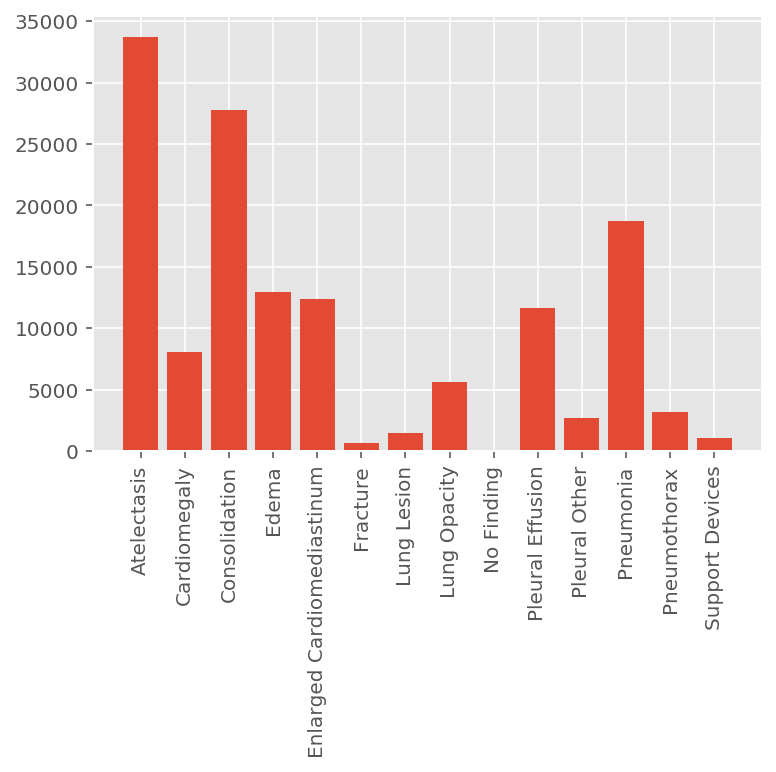

In [112]:
plt.bar(range(len(uncertainty_dict)), list(uncertainty_dict.values()))
plt.xticks(range(len(uncertainty_dict)), list(uncertainty_dict.keys()), rotation=90)

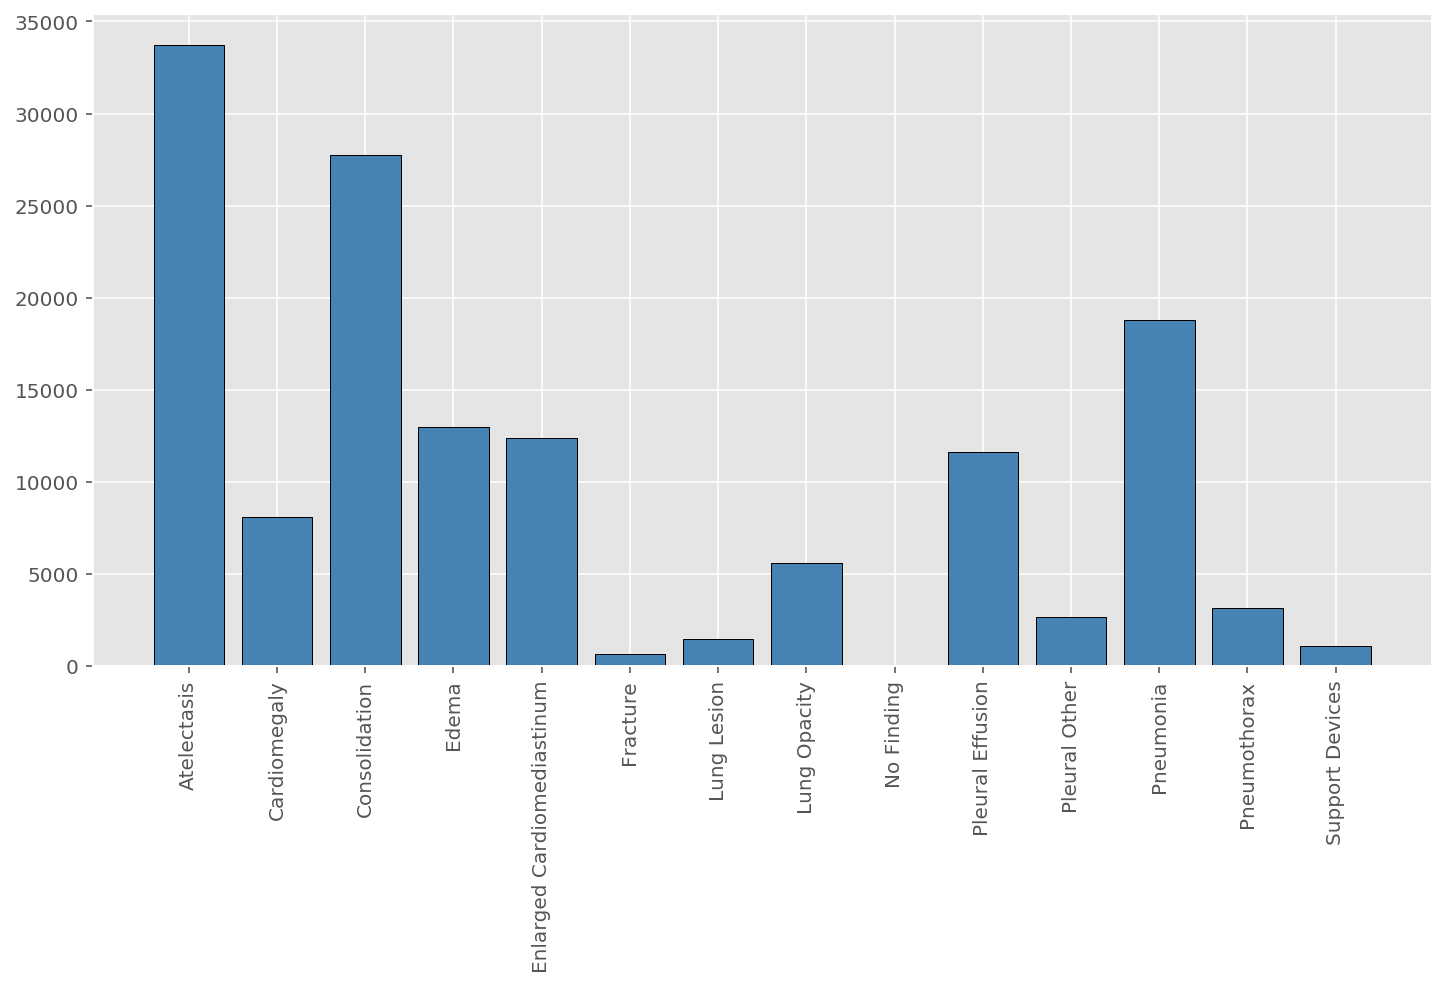

In [119]:
eda.plt_dict(uncertainty_dict)

In [123]:
sorted(uncertainty_dict.values(), reverse=True)

[33739,
 27742,
 18770,
 12984,
 12403,
 11628,
 8087,
 5598,
 3145,
 2653,
 1488,
 1079,
 642,
 0]

In [124]:
sorted(uncertainty_dict, key=uncertainty_dict.get, reverse=True)

['Atelectasis',
 'Consolidation',
 'Pneumonia',
 'Edema',
 'Enlarged Cardiomediastinum',
 'Pleural Effusion',
 'Cardiomegaly',
 'Lung Opacity',
 'Pneumothorax',
 'Pleural Other',
 'Lung Lesion',
 'Support Devices',
 'Fracture',
 'No Finding']

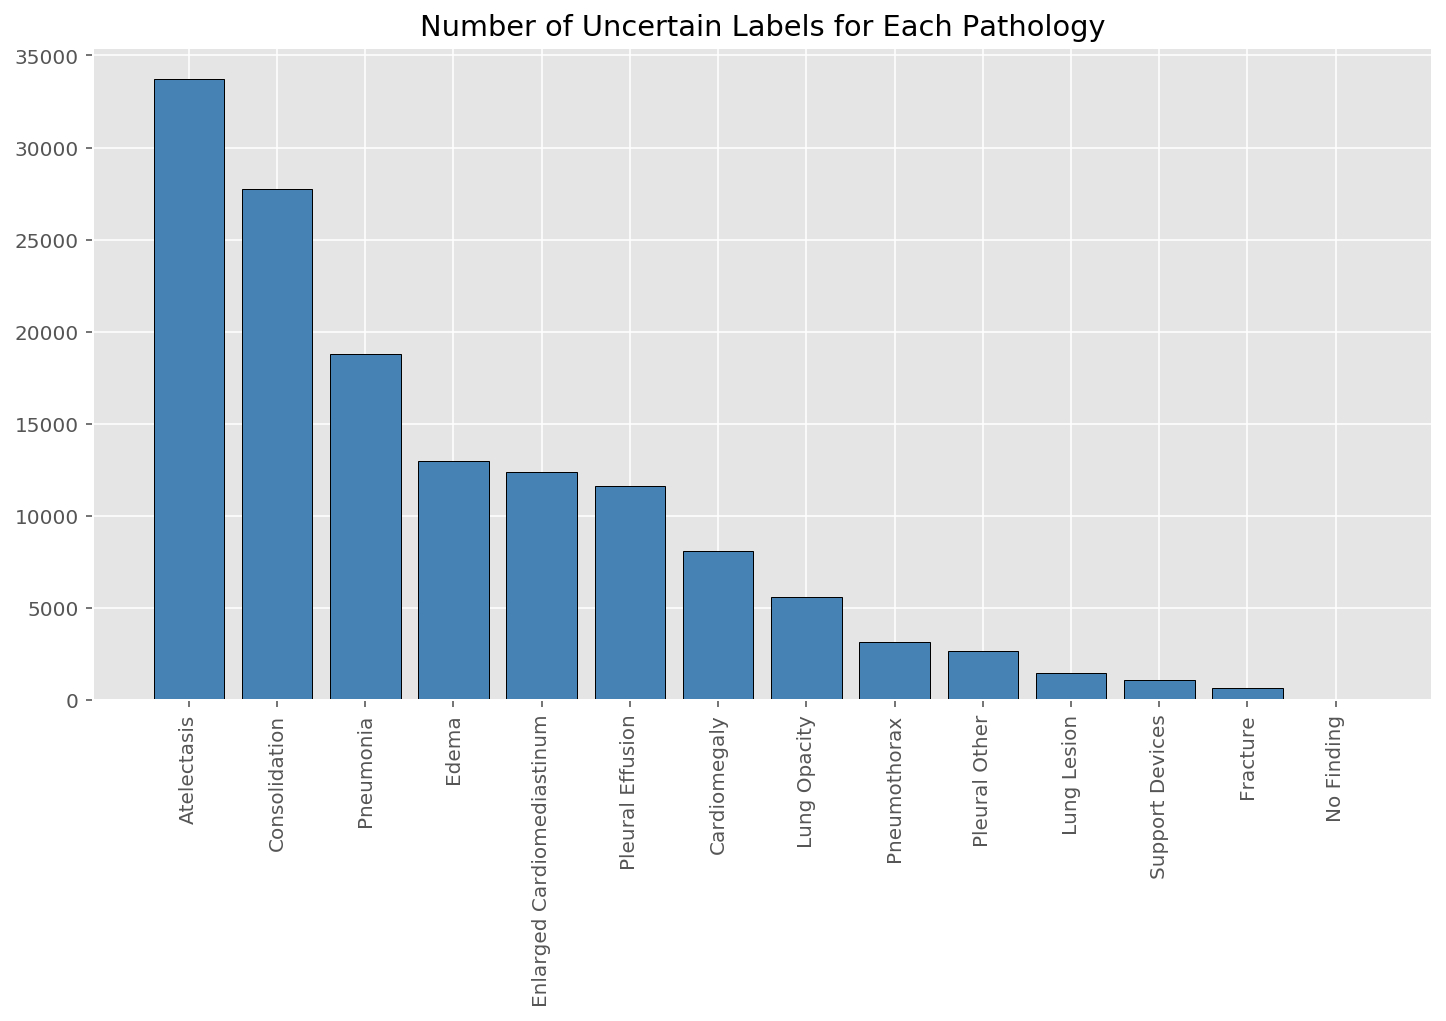

In [126]:
eda.plt_test(uncertainty_dict)

In [129]:
eda.negative_dict(pathology_list, train_df);

Atelectasis: 156299 or 69.96% of observations in that column.
Cardiomegaly: 188327 or 84.3% of observations in that column.
Consolidation: 180889 or 80.97% of observations in that column.
Edema: 158184 or 70.8% of observations in that column.
Enlarged Cardiomediastinum: 200213 or 89.62% of observations in that column.
Fracture: 213732 or 95.67% of observations in that column.
Lung Lesion: 212740 or 95.22% of observations in that column.
Lung Opacity: 112235 or 50.24% of observations in that column.
No Finding: 201033 or 89.98% of observations in that column.
Pleural Effusion: 125599 or 56.22% of observations in that column.
Pleural Other: 217238 or 97.24% of observations in that column.
Pneumonia: 198605 or 88.9% of observations in that column.
Pneumothorax: 200821 or 89.89% of observations in that column.
Support Devices: 106334 or 47.6% of observations in that column.


In [138]:
positive_dict = eda.positive_dict(pathology_list, train_df);

Atelectasis: 33376 or 14.94% of observations in that column.
Cardiomegaly: 27000 or 12.09% of observations in that column.
Consolidation: 14783 or 6.62% of observations in that column.
Edema: 52246 or 23.39% of observations in that column.
Enlarged Cardiomediastinum: 10798 or 4.83% of observations in that column.
Fracture: 9040 or 4.05% of observations in that column.
Lung Lesion: 9186 or 4.11% of observations in that column.
Lung Opacity: 105581 or 47.26% of observations in that column.
No Finding: 22381 or 10.02% of observations in that column.
Pleural Effusion: 86187 or 38.58% of observations in that column.
Pleural Other: 3523 or 1.58% of observations in that column.
Pneumonia: 6039 or 2.7% of observations in that column.
Pneumothorax: 19448 or 8.7% of observations in that column.
Support Devices: 116001 or 51.92% of observations in that column.


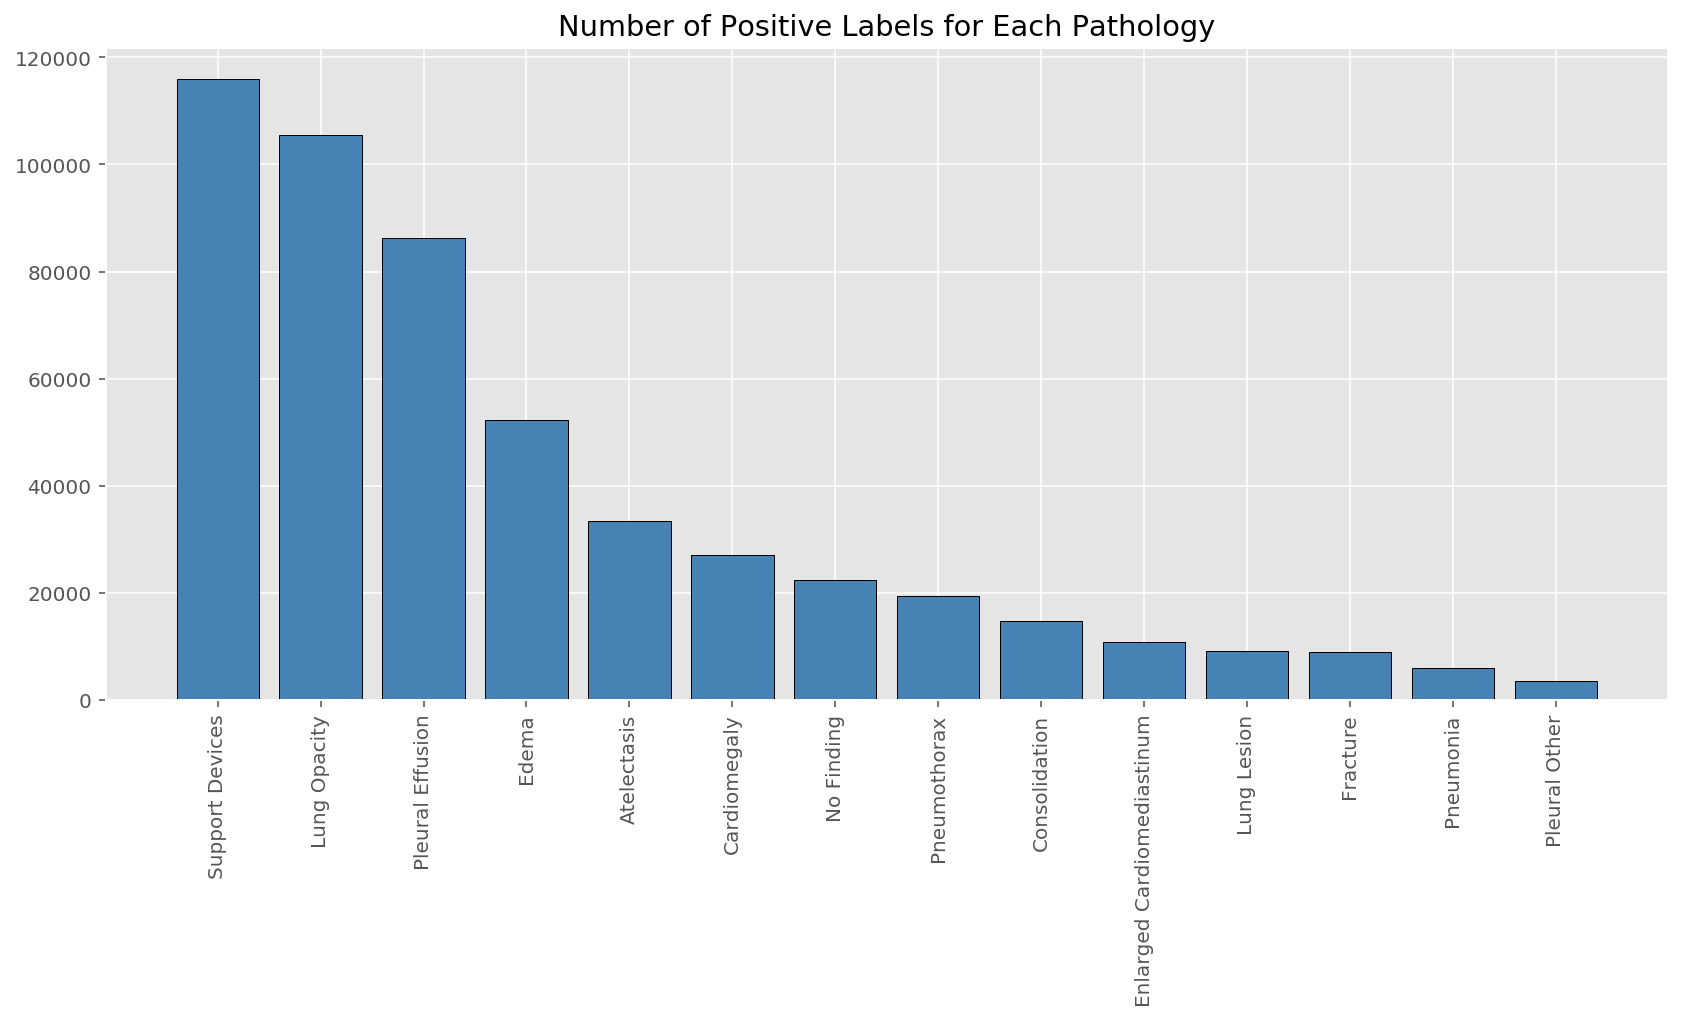

In [139]:
eda.plt_dict(positive_dict, 'Positive')

In [101]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223414 entries, 0 to 223413
Data columns (total 19 columns):
Path                          223414 non-null object
Sex                           223414 non-null category
Age                           223414 non-null int64
Frontal/Lateral               223414 non-null object
AP/PA                         191027 non-null object
No Finding                    223414 non-null int64
Enlarged Cardiomediastinum    223414 non-null int64
Cardiomegaly                  223414 non-null int64
Lung Opacity                  223414 non-null int64
Lung Lesion                   223414 non-null int64
Edema                         223414 non-null int64
Consolidation                 223414 non-null int64
Pneumonia                     223414 non-null int64
Atelectasis                   223414 non-null int64
Pneumothorax                  223414 non-null int64
Pleural Effusion              223414 non-null int64
Pleural Other                 223414 non-null int64

In [142]:
train_df[train_df['Atelectasis'] == 1].shape

(33376, 19)

In [83]:
for key, value in pathology_list:
    dict_uncertainty[key].append(value)   
    print('{}: {}'.format(pathology, uncertainty))

ValueError: too many values to unpack (expected 2)

In [82]:
from collections import defaultdict

uncertainty_dict = defaultdict()
uncertainty_dict

defaultdict(None, {})

In [80]:
from collections import defaultdict

uncertainty_dict = defaultdict(pathology_list)
for key, date in cur:
    dates_dict[key].append(date)





for pathology in pathology_list:
    dict_uncertainty = defaultdict()
    path_uncertainty = len(train_df[train_df[pathology] == -1])
for key, value in pathology_list:
    dict_uncertainty[key].append(value)   
    print('{}: {}'.format(pathology, uncertainty))

KeyError: 'Atelectasis'

In [79]:
dict_uncertainty

{'Support Devices': 1079}

In [43]:
train_df['Atelectasis'].value_counts()

 0    156299
-1     33739
 1     33376
Name: Atelectasis, dtype: int64

In [50]:
type(len(train_df[train_df['Atelectasis'] == -1]))

int

In [51]:
def uncertainty_pathology(path_list):
    for path in pathology_list:
        x = len(train_df[train_df[path] == -1])
        pct = x/len(train_df)
         print('Uncertain Labels for:', path, round(pct * 100, 3), '%')

IndentationError: unexpected indent (<ipython-input-51-84aad427d01c>, line 5)

In [ ]:
def plot_uncertainty(path_list):
    path_dict = {}
    for path in pathology_list:
        x = len(train_df[train_df[path] == -1])
        pct = x/len(train_df)
        unct_value = round(pct * 100, 3)
        
        print('Uncertain Labels for:', path, round(pct * 100, 3), '%')

In [123]:
uncertainty_pathology(pathology_list)

Uncertain Labels for: Atelectasis 15.102 %
Uncertain Labels for: Cardiomegaly 3.62 %
Uncertain Labels for: Consolidation 12.417 %
Uncertain Labels for: Edema 5.812 %
Uncertain Labels for: Enlarged Cardiomediastinum 5.552 %
Uncertain Labels for: Fracture 0.287 %
Uncertain Labels for: Lung Lesion 0.666 %
Uncertain Labels for: Lung Opacity 2.506 %
Uncertain Labels for: No Finding 0.0 %
Uncertain Labels for: Pleural Effusion 5.205 %
Uncertain Labels for: Pleural Other 1.187 %
Uncertain Labels for: Pneumonia 8.401 %
Uncertain Labels for: Pneumothorax 1.408 %
Uncertain Labels for: Support Devices 0.483 %


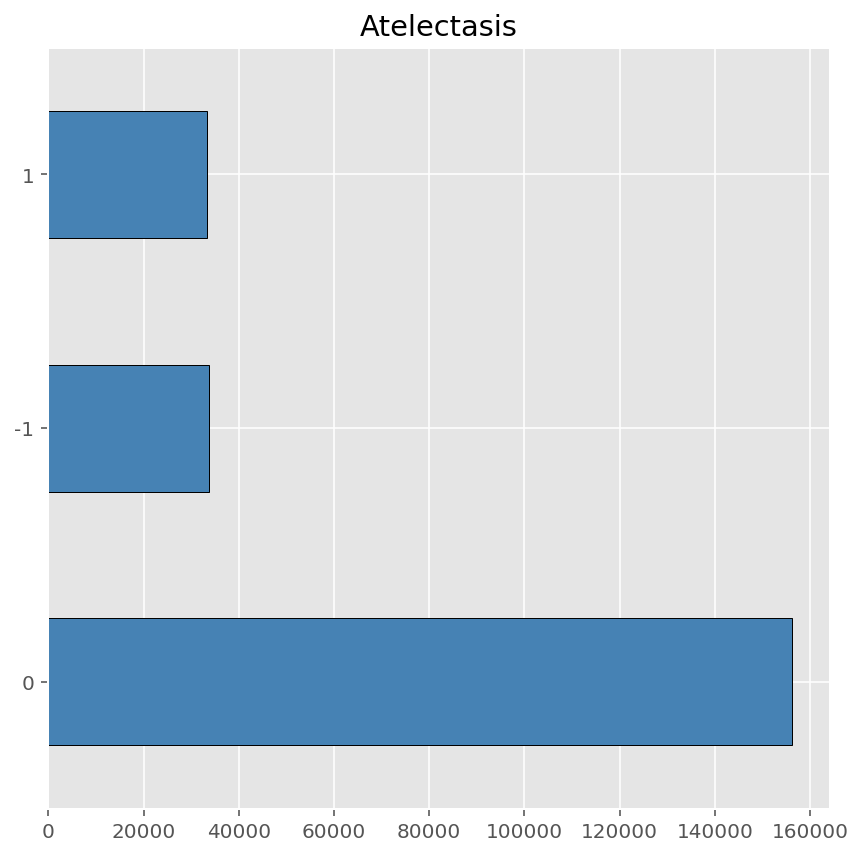

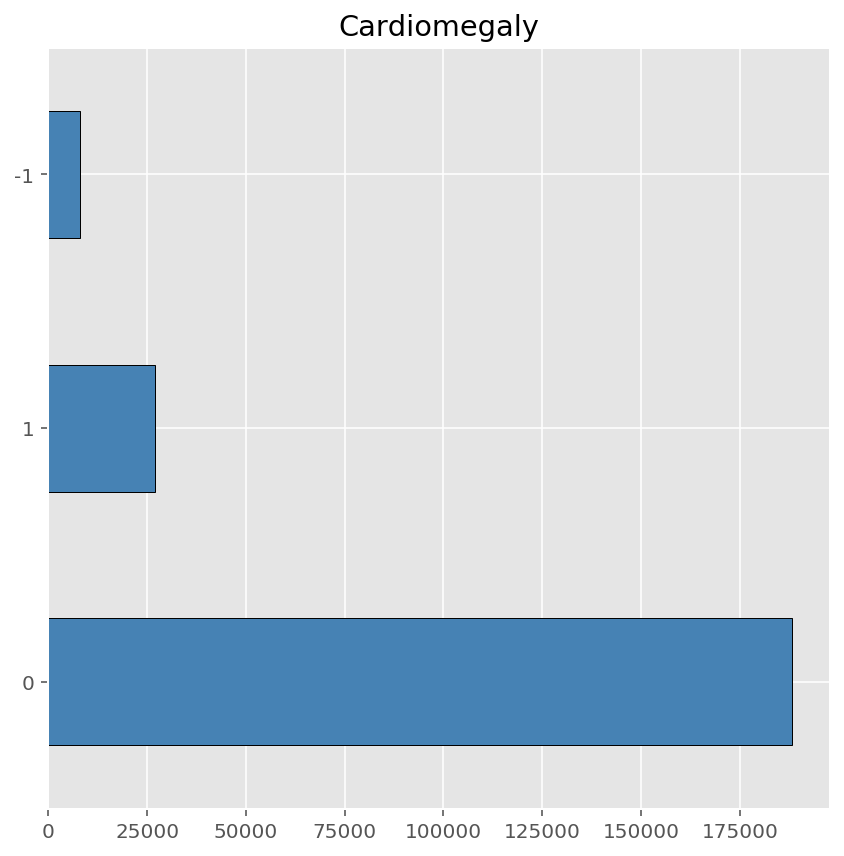

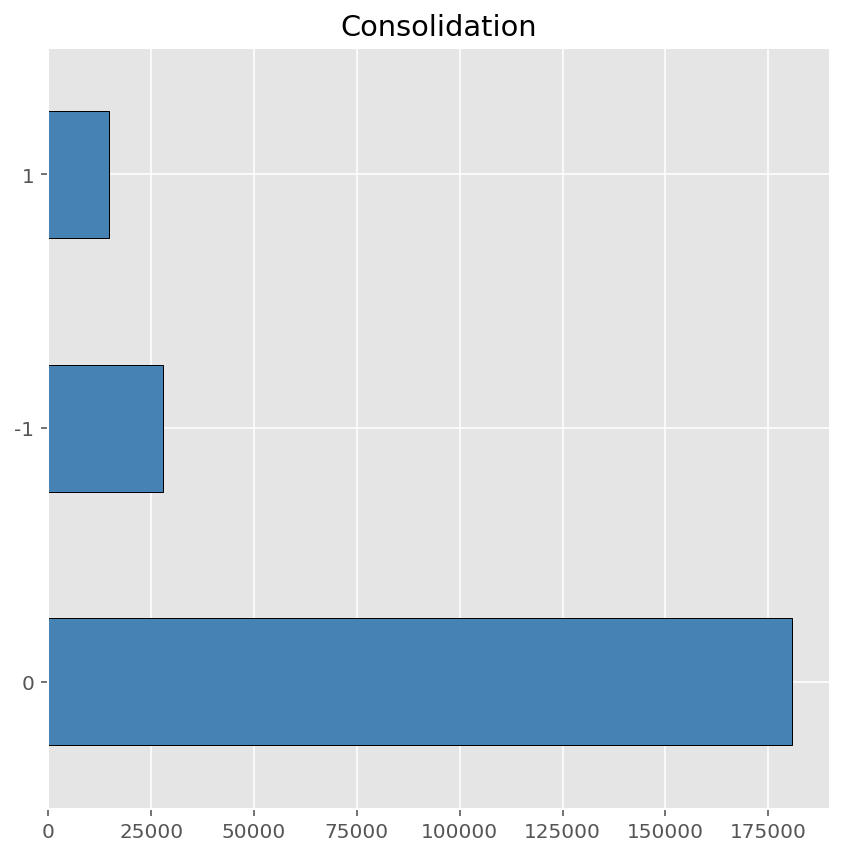

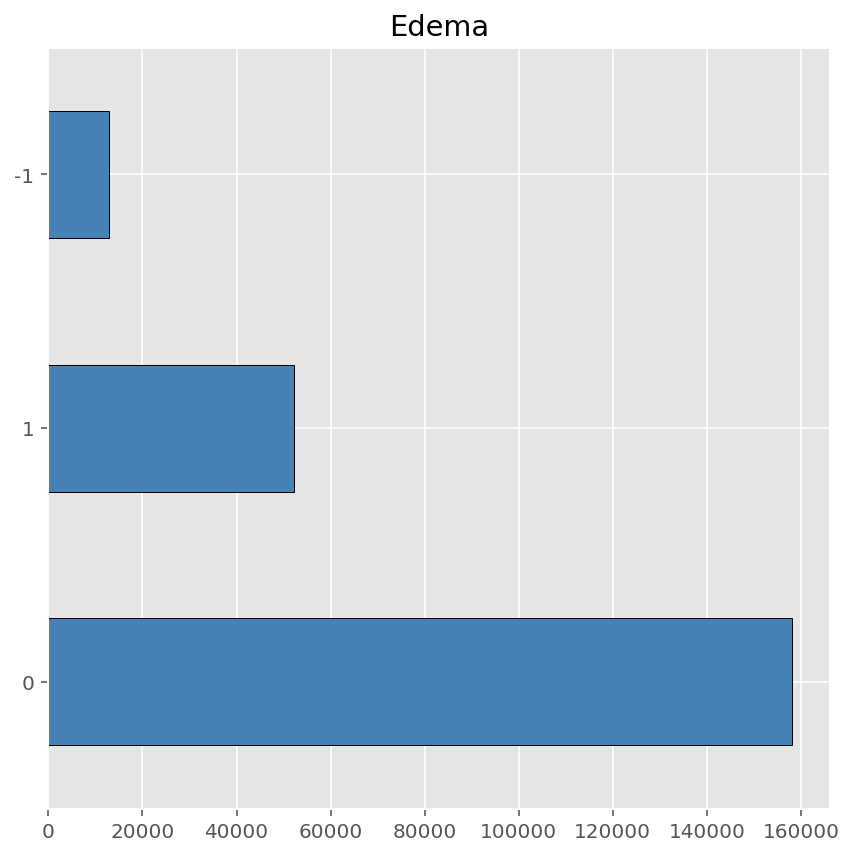

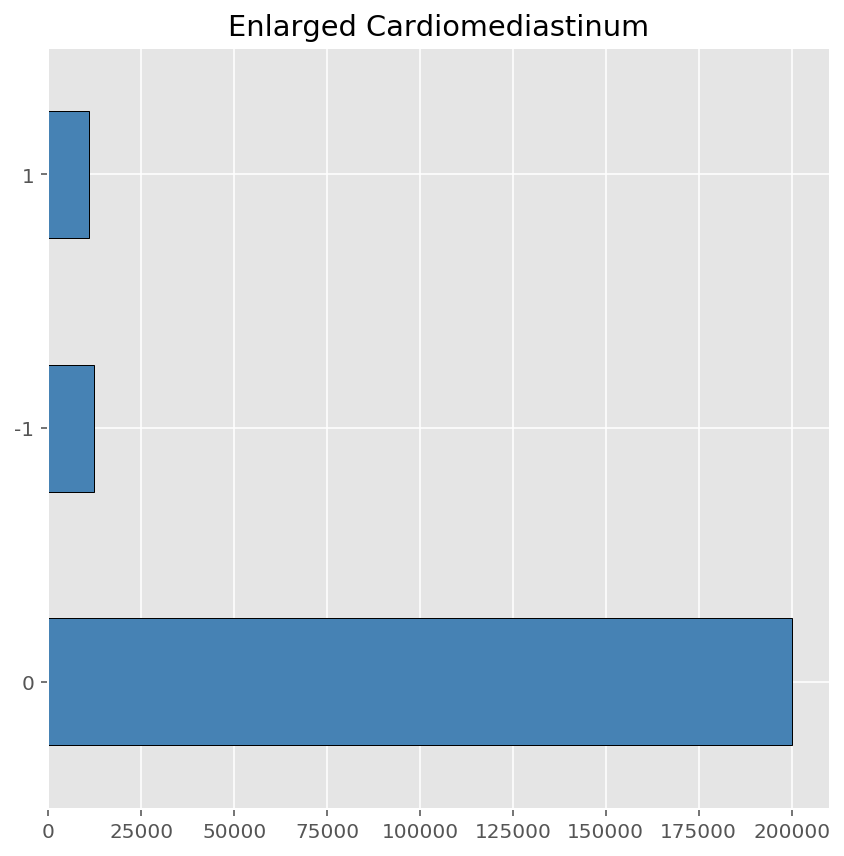

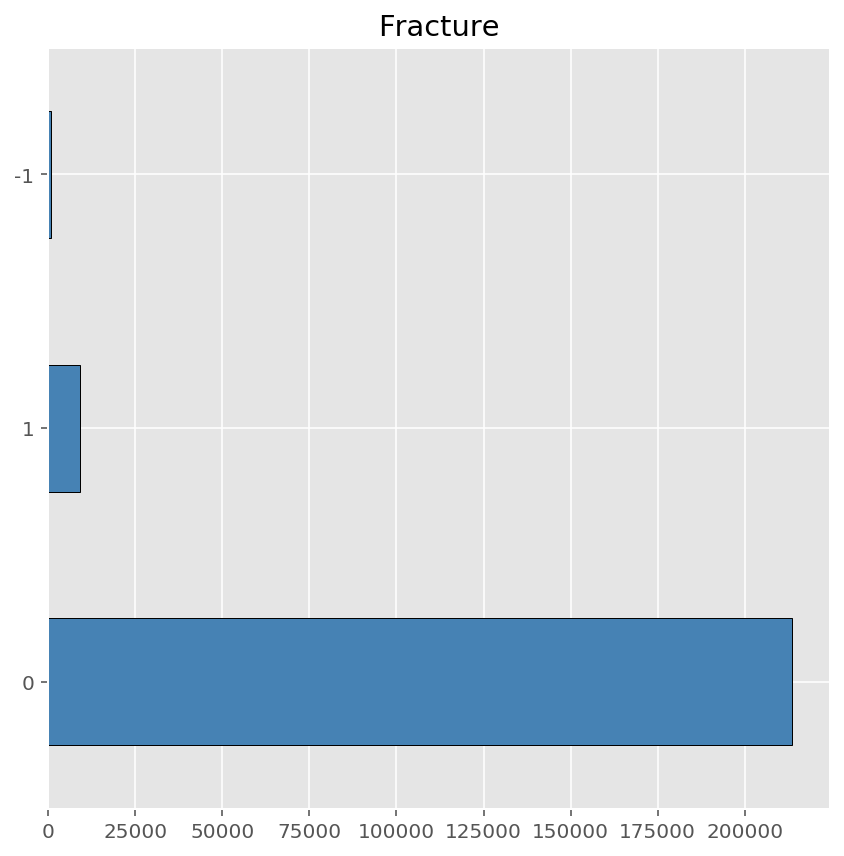

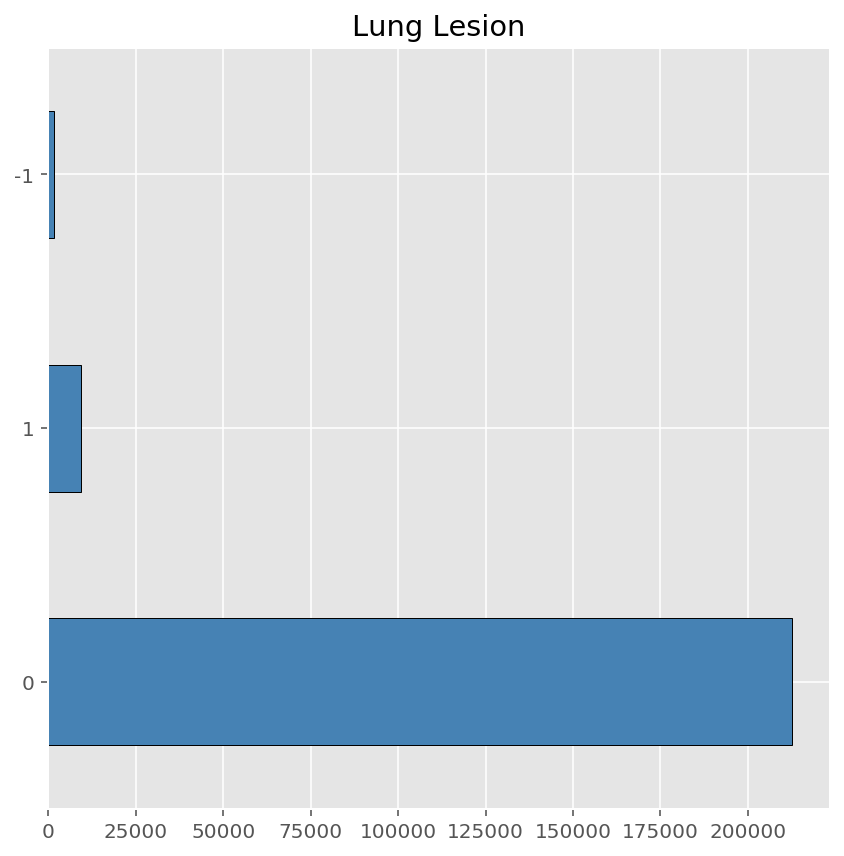

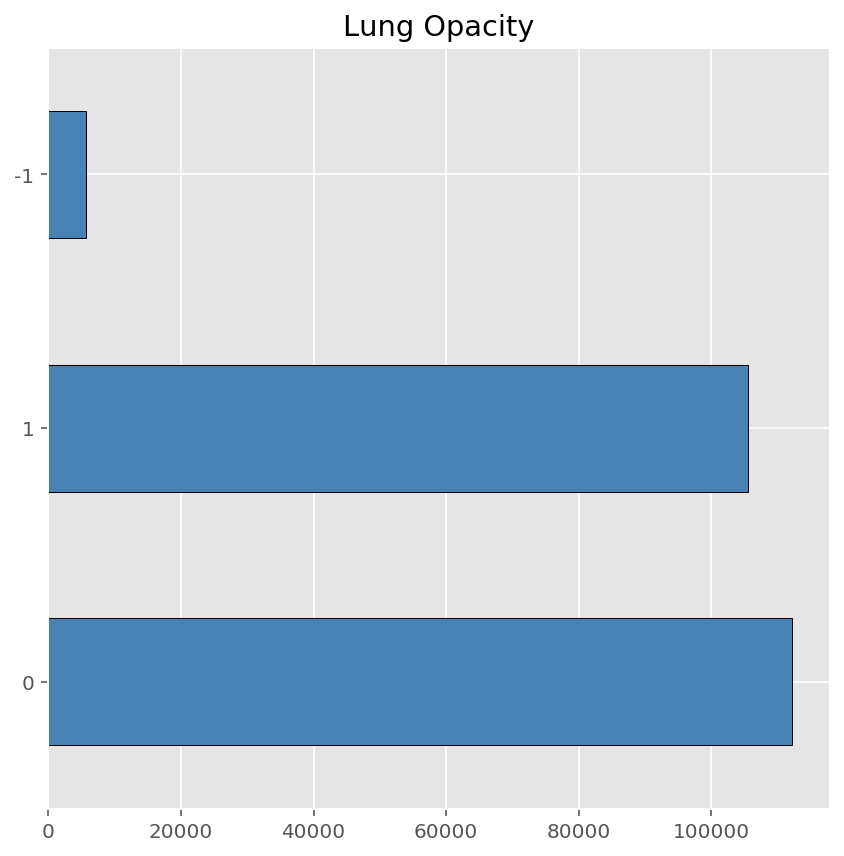

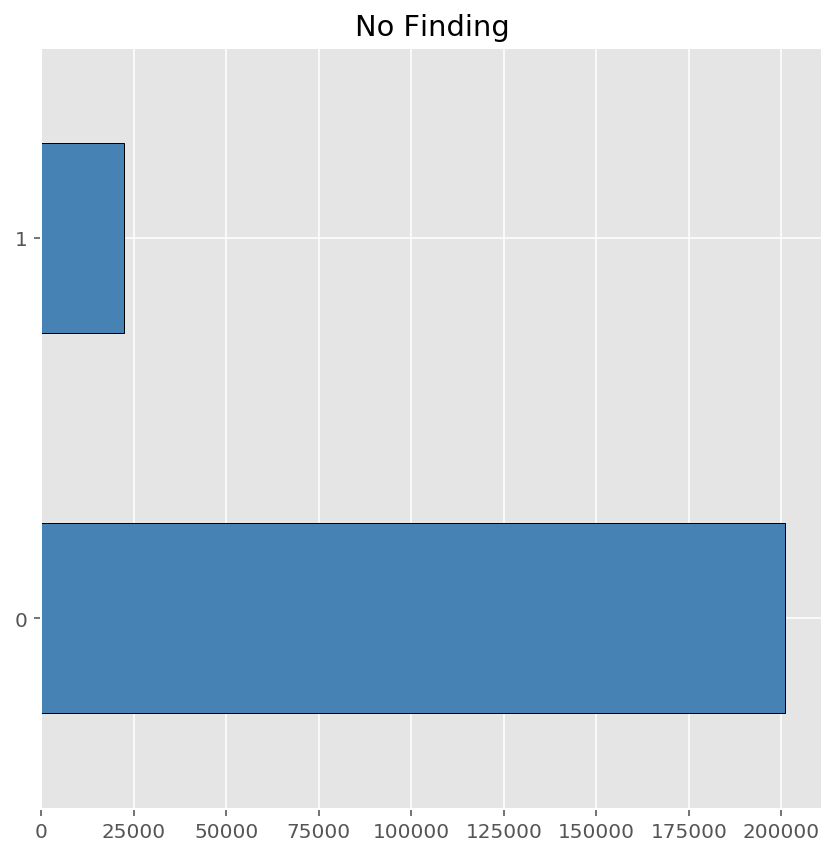

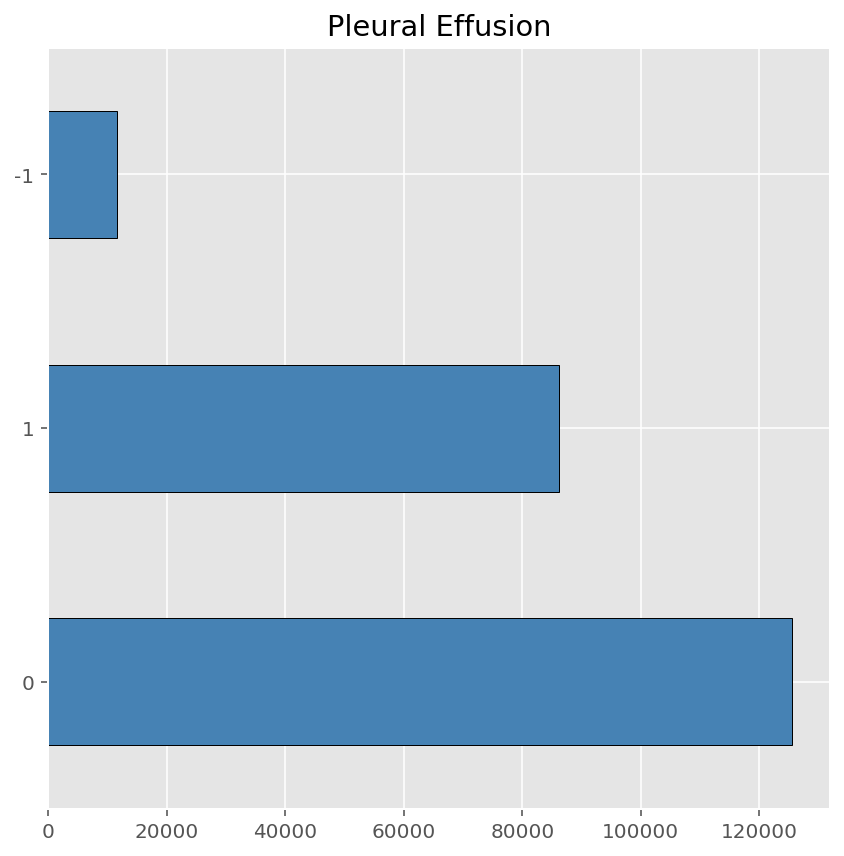

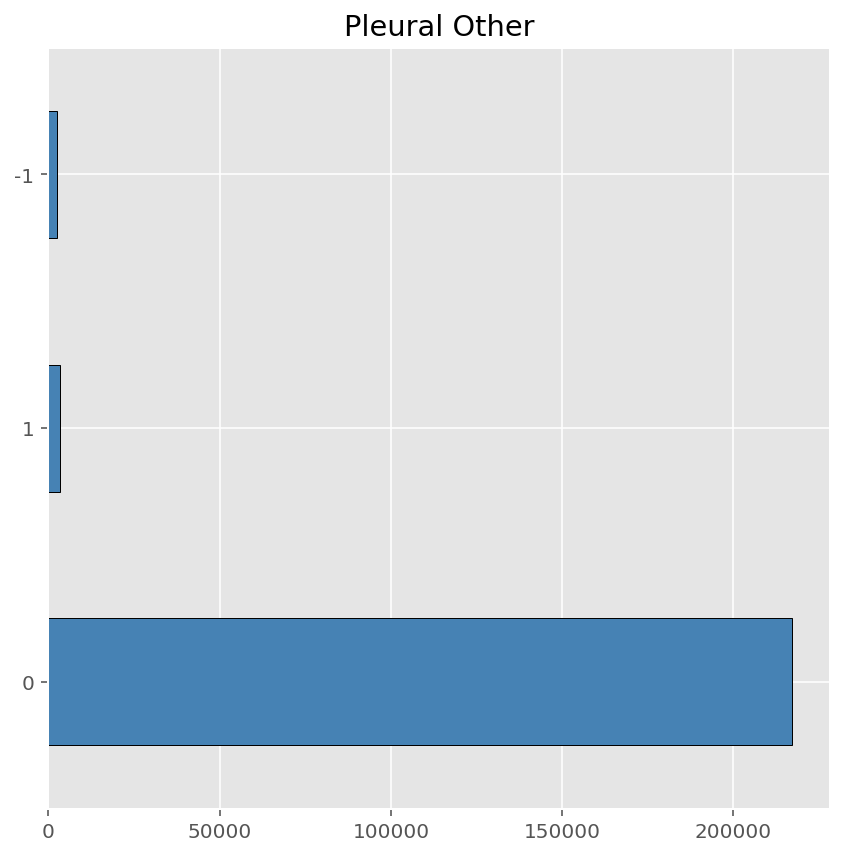

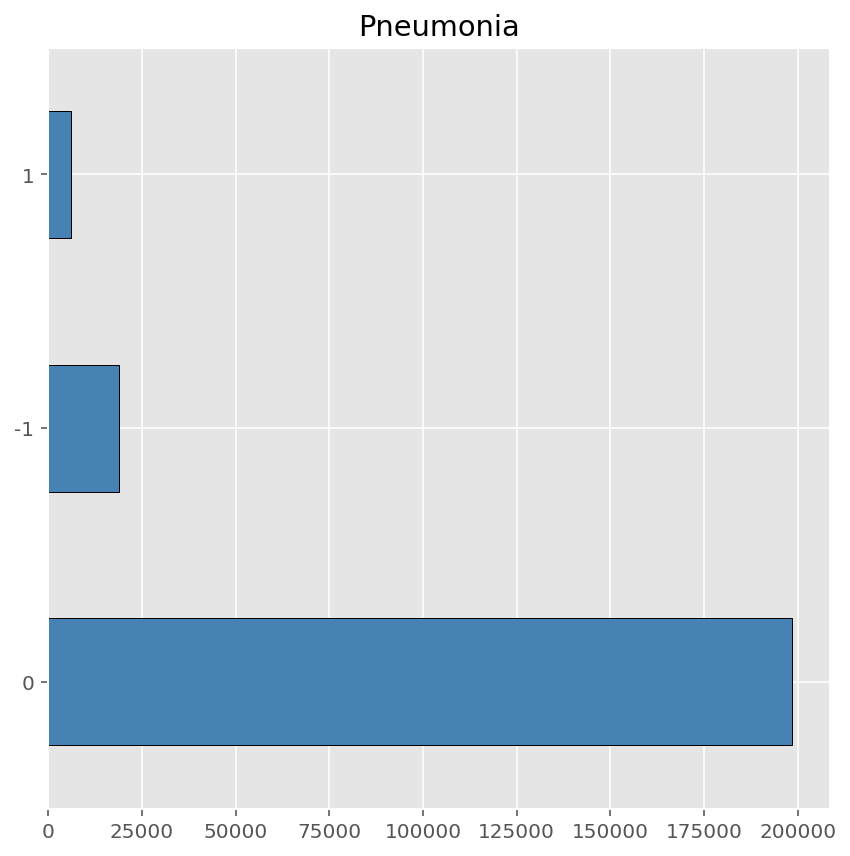

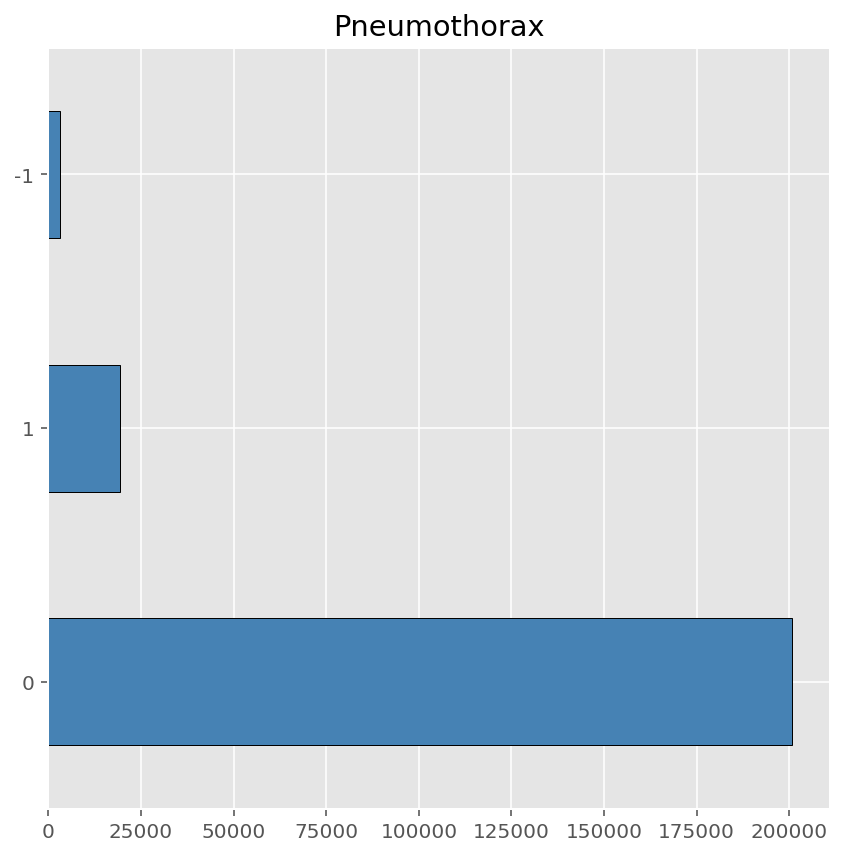

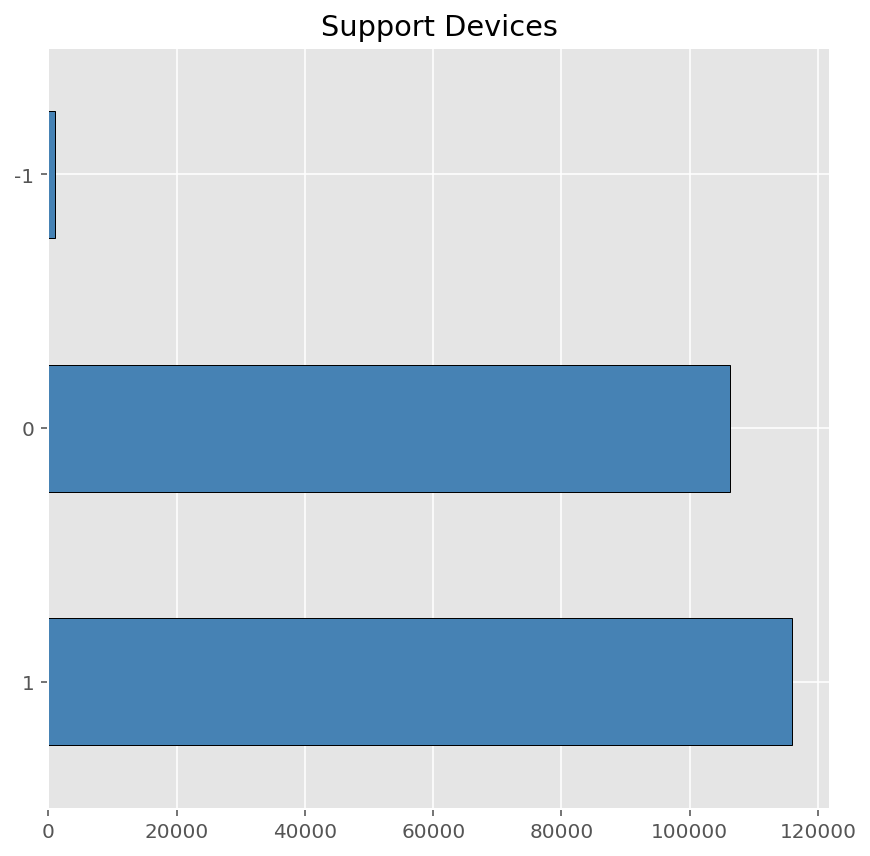

In [127]:
for path in pathology_list:
    plt.figure(figsize = (7,7))
    plt.title(path)
    plt.xticks()
    train_df[path].value_counts().plot(kind='barh', color='steelblue', edgecolor='black') 

In [ ]:
for pathology in pathology_list:
    list_values = []
    if